### Importing modules

In [1]:
import pandas as pd
import numpy as np
import spacy
from textblob import TextBlob

from statistics import mean, stdev
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

from sklearn.preprocessing import binarize

### Loading Data

In [2]:
data = pd.read_csv("project_18_dataset_combined.csv")
data = data[['label', 'text']]

#set display option
pd.set_option('display.max_colwidth', None)

#make target labels boolean
data['label']=data['label'].apply(lambda x: 1 if x == 14 else 0)

In [3]:
print(data.shape)
print(data.label.value_counts())
data.head()

(19821, 2)
0    18585
1     1236
Name: label, dtype: int64


,label,text
0,0,"Serious Youth Violence crimes, lone wolves basically."
1,0,Yesterday?
2,0,"I would argue with you, but it seems pointless. If I understand you, your argument is this: the UK can do whatever it wants the UK is never wrong"
3,0,"the whole thing is pretty dumb desu, school kids could be in a class of 12 or whatever all mingling and thats fine, but if they leave school and they all go to the park then thats not not allowed"
4,0,"I fucking hope you re right, lad."


### Lemmatizing text

In [4]:
nlp = spacy.load('en_core_web_md')
data['text_lemmatized'] = data['text'].apply(lambda x: " ".join([words.lemma_ for words in nlp(x)]))

In [5]:
data.head()

,label,text,text_lemmatized
0,0,"Serious Youth Violence crimes, lone wolves basically.","Serious Youth Violence crime , lone wolf basically ."
1,0,Yesterday?,yesterday ?
2,0,"I would argue with you, but it seems pointless. If I understand you, your argument is this: the UK can do whatever it wants the UK is never wrong","I would argue with you , but it seem pointless . if I understand you , your argument be this : the UK can do whatever it want the UK be never wrong"
3,0,"the whole thing is pretty dumb desu, school kids could be in a class of 12 or whatever all mingling and thats fine, but if they leave school and they all go to the park then thats not not allowed","the whole thing be pretty dumb desu , school kid could be in a class of 12 or whatever all mingle and that s fine , but if they leave school and they all go to the park then that s not not allow"
4,0,"I fucking hope you re right, lad.","I fucking hope you re right , lad ."


#### Q: WHAT SIZE EN_CORE_WEB TO USE???

### Evaluating effect of lemmatization (ceteris paribus)

In [7]:
#train/test split on original and preprocessed data
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(data.text, data.label, test_size=0.2, random_state=88, stratify=data.label)
X_train, X_test, y_train, y_test = train_test_split(data.text_lemmatized, data.label, test_size=0.2, random_state=88, stratify=data.label)

In [8]:
print(y_train_old.value_counts())
print(y_train.value_counts())
print(y_test_old.value_counts())
print(y_test.value_counts())

0    14867
1      989
Name: label, dtype: int64
0    14867
1      989
Name: label, dtype: int64
0    3718
1     247
Name: label, dtype: int64
0    3718
1     247
Name: label, dtype: int64


In [9]:
#vectorizing train data and transforming test data
vectorizer = CountVectorizer()
X_train_old_dtm = vectorizer.fit_transform(X_train_old)
X_test_old_dtm = vectorizer.transform(X_test_old)
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

In [10]:
#train model on X_train_dtm
mnb_old = MultinomialNB()
mnb = MultinomialNB()
mnb_old.fit(X_train_old_dtm, y_train_old)
mnb.fit(X_train_dtm, y_train)

MultinomialNB()

In [11]:
#make class prediction for X_test_dtm
y_pred_class_old = mnb_old.predict(X_test_old_dtm)
y_pred_class = mnb.predict(X_test_dtm)

In [12]:
from collections import Counter
print(Counter(y_pred_class_old))
print(Counter(y_pred_class))

Counter({0: 3873, 1: 92})
Counter({0: 3871, 1: 94})


In [13]:
#comparing confusing matrices
print('old model cm:')
print(confusion_matrix(y_test_old, y_pred_class_old))
print('new model cm:')
print(confusion_matrix(y_test, y_pred_class))

old model cm:
[[3698   20]
 [ 175   72]]
new model cm:
[[3694   24]
 [ 177   70]]


In [14]:
#calculating accuracy, precison
print('accuracy score old model:', accuracy_score(y_test_old, y_pred_class_old))
print('accuracy score new model:', accuracy_score(y_test, y_pred_class))
print('-----')
print('precision score old model:', precision_score(y_test_old, y_pred_class_old))
print('precision score new model:', precision_score(y_test, y_pred_class))
print('-----')
print('recall score old model:', recall_score(y_test_old, y_pred_class_old))
print('recall score new model:', recall_score(y_test, y_pred_class))

accuracy score old model: 0.9508196721311475
accuracy score new model: 0.9493064312736443
-----
precision score old model: 0.782608695652174
precision score new model: 0.7446808510638298
-----
recall score old model: 0.291497975708502
recall score new model: 0.2834008097165992


### Spelling correction

In [15]:
#def spelling_corrector(txt):
#    blob = TextBlob(txt)
#    return str(blob.correct())


#data['text_spelling_corrected'] = data['text_lemmatized'].apply(lambda x : [spelling_corrector(x)])
#data.head()

In [16]:
#data['text_spelling_corrected2'] = data['text_lemmatized'].apply(lambda x: ' '.join(TextBlob(x).correct()))
#data.head

### Evaluating effect of spell corrector

### Effect of random states (ceteris paribus)

In [17]:
#make model with range of random states in train/test split
random_state_range = range(0, 1000)
rs_scores = []
for rs in random_state_range:
    vectorizer = CountVectorizer()
    mnb = MultinomialNB()
    X_train, X_test, y_train, y_test = train_test_split(data.text_lemmatized, data.label, random_state=rs, test_size=0.2, stratify=data.label)
    
    X_train_dtm = vectorizer.fit_transform(X_train)
    X_test_dtm = vectorizer.transform(X_test)
    
    mnb.fit(X_train_dtm, y_train)
    
    y_pred_class = mnb.predict(X_test_dtm)
    
    rs_scores.append(precision_score(y_test, y_pred_class))

mean precision: 0.7139996254492633
st.dev. of mean prec: 0.0400609880384337


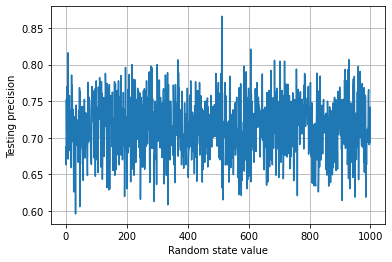

In [18]:
#calculating mean precision and standard deviation
print('mean precision:', mean(rs_scores))
print('st.dev. of mean prec:', stdev(rs_scores))

#make plot
plt.plot(random_state_range, rs_scores)
plt.xlabel('Random state value')
plt.ylabel('Testing precision')

plt.grid(True)

### Effect of test size (ceteris paribus)

In [19]:
#make model with varying test sizes in train/test split
test_size_range = np.linspace(0.05,0.5,91)
test_size_scores = []

for ts in test_size_range:
    vectorizer = CountVectorizer()
    mnb = MultinomialNB()
    X_train, X_test, y_train, y_test = train_test_split(data.text_lemmatized, data.label, test_size=ts, random_state=88, stratify=data.label)
    
    X_train_dtm = vectorizer.fit_transform(X_train)
    X_test_dtm = vectorizer.transform(X_test)
    
    mnb.fit(X_train_dtm, y_train)
    
    y_pred_class = mnb.predict(X_test_dtm)
    
    test_size_scores.append(precision_score(y_test, y_pred_class))

mean precision: 0.7512094039315056
st.dev. of mean prec: 0.03605124198461414


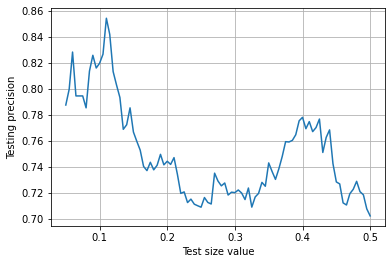

In [20]:
#calculating mean precision and standard deviation
print('mean precision:', mean(test_size_scores))
print('st.dev. of mean prec:', stdev(test_size_scores))

#make plot
plt.plot(test_size_range, test_size_scores)
plt.xlabel('Test size value')
plt.ylabel('Testing precision')

plt.grid(True)

### Hyperparameter tuning

In [21]:
#train/test splitting
X_train, X_test, y_train, y_test = train_test_split(data.text_lemmatized, data.label, test_size=0.2, random_state=88, stratify=data.label)

In [22]:
#making pipeline
pipeline = Pipeline([ ('vectorizer', CountVectorizer()), ('classifier', MultinomialNB()) ])

##### Q: include ('tfidf', TfidfTransformer()) in pipeline???

In [23]:
#grid = {
    #'vectorizer__strip_accents': [None, 'ascii', 'unicode'], #works
    #'vectorizer__lowercase': [True, False], #works
    #'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)], #works
    #'vectorizer__stop_words': [None, 'english'], #works
    #'vectorizer__max_df': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5], #works
    #'vectorizer__min_df': [1, 0.001, 0.002, 0.005, 0.01, 0.02], #works
    #'vectorizer__max_features': [None, 1, 10, 100, 1000, 10000], #works
    #'classifier__alpha': [0.1, 0.5, 1.0, 2.0], #works
    #'classifier__fit_prior': [True, False], #works
    #'classifier__class_prior': [[0.1, 0.9], [0.1, 0.8], [0.2, 0.9], [0.2, 0.8]], #works
    #'tfidf__norm': ['l1', 'l2'], #works
    #'tfidf__use_idf': [True, False], #works
    #'tfidf__smooth_idf': [True, False], #works
    #'tfidf__sublinear_tf': [True, False], #works
#}

#grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='precision', cv=10)
#grid_search.fit(X, y)

#print("-----------")
#print(grid_search.best_score_)
#print(grid_search.best_params_)

In [24]:
grid = {}
        

grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='precision', cv=10)
grid_search.fit(data.text_lemmatized, data.label)

print(grid_search.best_score_)
print(grid_search.best_params_)

results = pd.DataFrame(grid_search.cv_results_)
results[['params', 'mean_test_score','std_test_score']]

0.5936615940326759
{}


,params,mean_test_score,std_test_score
0,{},0.593662,0.113248


### Evaluation between models with default and tuned parameters

In [25]:
#calculating accuracy, precison and roc_auc between models with default and tuned parameters
#set best parameters in pipeline for comparison

pipeline_old = Pipeline([ ('vectorizer', CountVectorizer()), ('classifier', MultinomialNB()) ])
pipeline = Pipeline([ ('vectorizer', CountVectorizer()), ('classifier', MultinomialNB()) ])
     
model_old = pipeline_old.fit(X_train, y_train)
model = pipeline.fit(X_train, y_train)

y_pred_class_old = model_old.predict(X_test)
y_pred_class = model.predict(X_test)

print('accuracy score before tuning model:', accuracy_score(y_test, y_pred_class_old))
print('accuracy score after tuning:', accuracy_score(y_test, y_pred_class))
print('-----')
print('precision score before tuning:', precision_score(y_test, y_pred_class_old))
print('precision score after tuning:', precision_score(y_test, y_pred_class))
print('-----')
print('recall score before tuning:', recall_score(y_test, y_pred_class_old))
print('recall score after tuning:', recall_score(y_test, y_pred_class))

accuracy score before tuning model: 0.9493064312736443
accuracy score after tuning: 0.9493064312736443
-----
precision score before tuning: 0.7446808510638298
precision score after tuning: 0.7446808510638298
-----
recall score before tuning: 0.2834008097165992
recall score after tuning: 0.2834008097165992


In [26]:
print(Counter(y_test))
print(Counter(y_pred_class_old))
print(Counter(y_pred_class))

Counter({0: 3718, 1: 247})
Counter({0: 3871, 1: 94})
Counter({0: 3871, 1: 94})


In [27]:
#comparing confusing matrices
print('old model cm:')
print(confusion_matrix(y_test, y_pred_class_old))
print('new model cm:')
print(confusion_matrix(y_test, y_pred_class))

old model cm:
[[3694   24]
 [ 177   70]]
new model cm:
[[3694   24]
 [ 177   70]]


#### Q: Crossvalidation on final model???

### Examining results

In [28]:
#see false positive comments
false_positives = pd.DataFrame({'false_positives': X_test[(y_pred_class==1) & (y_test==0)]})
print(false_positives.shape)
false_positives

(24, 1)


,false_positives
14617,labor=/value freeloader and incentive dilemma be insoluble Collectivism always devolve into a purity spiral a beauracratic rule class always evolve out of the necessity for order and organization
13612,om nom nom nom butthole
14619,"collectivism always devolve into a purity spiral that s not true . charity be a version of collectivism . now , state - mandate collectivism , on the other hand ..."
11042,degenerate Germans ... I m shocked .
14340,pyramid on mars look into it
19243,diese Schills Mann ... der ewige Jude . sieht härter die tunte see ... I know it just from your low iq go back to your shtetl moshe you literally glow to we white people you swarthy faggot
1170,czech slav med nigger germanic no rdic jews
19032,bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk bunk
4612,Artist s futuristic depiction of mixed - race planet of the Goyim
19648,who will win ? ThirdPostion or Capitalism Autocracy or Democracy Nietzche or Wagner Collapse or Reform Axis or ( ( ( Allies ) ) ) Evola or Dinesh D Souza European Idealism or American Consumerism


In [29]:
#see false negative comments
false_negatives = pd.DataFrame({'false_negatives': X_test[(y_pred_class==0) & (y_test==1)]})
print(false_negatives.shape)
false_negatives

(177, 1)


,false_negatives
9296,"framer set up a near - perfect system . work fairly well . but , over time , it be subvert and corrupt . ( you ) the FRAMERS be utopian retard ! so ... you re blame the subversion and corruption that take place century after the Framers be dead on the framer themselves ? think I find your problem - why the subversion and corruption be so effective . you re a fucking idiot . it s easy to subvert and corrupt idiot ."
7010,"have the USA reach Weimar level America be only 1/4 of the way there . Germans burn their money to stay warm in the winter . child prostitute operate in public in Berlin , people would see 10yr old for sale at the train station . Germans fight a Civil War against Bolsheviks where 3 - 4mil people die . Most people have no idea the hell Germany have to go through before they be ready to go all in with the Nazi party . however many indicator point to the kike implode the dollar after the election and create skyrocket inflation which will make the 2007 - 08 collapse look like a good time . if that happen then we be 1/2 way there . in the meantime the Civil War narrative continue to be nurture while they wreck the Main Street economy with Covid bullshit . if it happen we still have several more year to go ."
6146,"sometimes I doubt if this be true , because I lose fat and my muscle size get noticable big and my weight go down . unironically yes . I don t do the stuff but a lot of drug habit will keep you skinny whether its weed cig or hard shit . almost all fat people do no drug . everyone be skinny in the 50 til the 80 and during this time americans be pop a lot of pill and everyone smoke cig ."
10523,don t buy insurance be healthy how they do it in the old day .. it work .
2768,since they ve adopt socialism with national characteristic in the 80
...,...
8221,"it can t , green troop be still go to be green . its funny you think there still migbt be 95 year old korean war vet in the PLA though ."
6542,"Nazbol be kike ( as it be invent by a kike pic relate ) but Strasserism be base . I do nt give a fuck if we abolish wage labor or do away with the market system I have no great love for ( ( ( capitalism ) ) ) the most important thing be that we do nt allow jews into the system . ( or non - white in general ) as long as the tribe do nt rule over we I be sure white could make any economic system work for they extremely well on a long enough time frame . Sartre a jew to be fair I be really just call he a kike as insult instead of litterally I do apologize if that be unclear . of course people subject to hundred of year of that will have a low iq as a result . it s not inherent in their biology , most of what racist attribute to inherent biology can actually be explain by political - economy . and why would you assume that that be the drive force ? literally ever other intellectual state we can find be about 50 percent inherente if you be the son of an alcoholic ? even if you be raise from birth in another family you still have a much high likelyhood to become acholoic latter in life . why be that communist assume that this one trait be determine completely independent of GENETICS despite all the evidence to the contrary and despite the fact that if true it would make we different then litterally all life on planet earth include our fellow primate ? ? this creationist teir shit frankly . Pedophilia be always kike and third reich unironically do nt do that shit . even post war jewish historian usually be nt dishonest enough to pretend they come anywhere near do that specific bullshit ."
12180,you will get your free helicopter ride .
2492,"local news : guy it totally isn t the left or the right do this 2 article down : another 2 people catch lighting wildfire I m really feed up with it . and the irony , they be just lambaste trump for downplay the virus , now they spin around and do the same thing to the arson . except the virus be a hoax and the fire have already displace half a million people in or

In [30]:
# store the vocabulary of X_train
X_train_tokens = vectorizer.get_feature_names()

# number of times each token appears across all history comments
hisco_token_count = mnb.feature_count_[1, :]

# number of times each token appears across all non-history comments
nhisco_token_count = mnb.feature_count_[0, :]

In [31]:
# create a DataFrame of tokens with their separate his and non-his counts
tokens = pd.DataFrame({'token':X_train_tokens, 'non_history':nhisco_token_count, 'history':hisco_token_count}).set_index('token')

# add 1 to each label counts to avoid dividing by 0
tokens['non_history'] = tokens.non_history + 1
tokens['history'] = tokens.history + 1

# convert his and non-his counts into frequencies
tokens['non_history'] = tokens.non_history / mnb.class_count_[0]
tokens['history'] = tokens.history / mnb.class_count_[1]

# calculate the ratio of his-to-non-his for each token
tokens['history_ratio'] = tokens.history / tokens.non_history

# calculate the ratio of non-his-to-his for each token
tokens['non_history_ratio'] = tokens.non_history / tokens.history

In [32]:
# examine the DataFrame sorted by history_comments_ratio
tokens_his = tokens.sort_values('history_ratio', ascending=False)
tokens_his[0:10]

,non_history,history,history_ratio,non_history_ratio
token,,,,
hitler,0.000108,0.071197,661.566343,0.001512
rome,0.000108,0.029126,270.640777,0.003695
ussr,0.000108,0.027508,255.605178,0.003912
weimar,0.000108,0.025890,240.569579,0.004157
jfk,0.000108,0.025890,240.569579,0.004157
holocaust,0.000108,0.024272,225.533981,0.004434
files,0.000108,0.021036,195.462783,0.005116
archives,0.000108,0.021036,195.462783,0.005116
rese,0.000108,0.019417,180.427184,0.005542


In [33]:
# examine the DataFrame sorted by non_history_comments_ratio
tokens_non_his = tokens.sort_values('non_history_ratio', ascending=False)
tokens_non_his[0:10]

,non_history,history,history_ratio,non_history_ratio
token,,,,
test,0.011515,0.001618,0.140520,7.116444
biden,0.011192,0.001618,0.144573,6.916918
gay,0.008502,0.001618,0.190324,5.254197
virus,0.016035,0.003236,0.201820,4.954907
sssssssssssssssssssssssssssssssssss,0.007318,0.001618,0.221112,4.522600
calorie,0.006995,0.001618,0.231317,4.323074
mask,0.006888,0.001618,0.234931,4.256565
report,0.006565,0.001618,0.246485,4.057038
eat,0.019372,0.004854,0.250593,3.990529


In [34]:
# look up the history_ratio for a given token
# tokens.loc['', 'history_ratio']

### Threshold and further evaluation

In [35]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

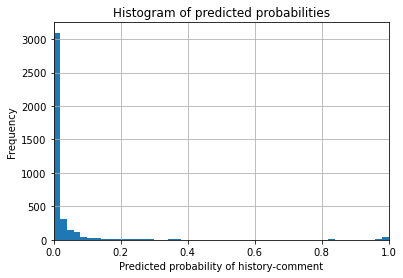

In [36]:
plt.hist(y_pred_prob, bins=50)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of history-comment')
plt.ylabel('Frequency')

plt.grid(True)

In [37]:
y_pred_class_new = binarize([y_pred_prob], 0.9)[0]

C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [38]:
print(confusion_matrix(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class_new))

[[3694   24]
 [ 177   70]]
[[3710    8]
 [ 202   45]]


In [39]:
print(accuracy_score(y_test, y_pred_class))
print(accuracy_score(y_test, y_pred_class_new))
print('-----')
print(precision_score(y_test, y_pred_class))
print(precision_score(y_test, y_pred_class_new))
print('-----')
print(recall_score(y_test, y_pred_class))
print(recall_score(y_test, y_pred_class_new))

0.9493064312736443
0.9470365699873896
-----
0.7446808510638298
0.8490566037735849
-----
0.2834008097165992
0.18218623481781376


In [40]:
threshold_range = (np.linspace(0.01,0.99,99))
y_pred_class_precision_scores = []
y_pred_class_recall_scores = []

for th in threshold_range:
    #insert model also?
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred_class = binarize([y_pred_prob], th)[0]
    
    y_pred_class_precision_scores.append(precision_score(y_test, y_pred_class))
    y_pred_class_recall_scores.append(recall_score(y_test, y_pred_class))

C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.01 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.02 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.03 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.04 as keyword args. 

C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.29000000000000004 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.31 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.32 as 

C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.5700000000000001 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.5800000000000001 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.59 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass thre

C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.85 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.86 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.87 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.88 as keyword args. 

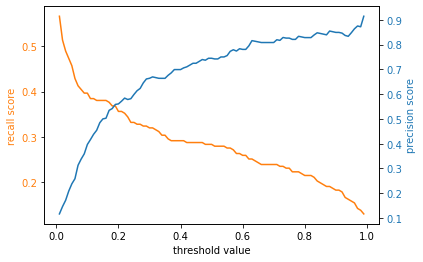

In [41]:
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('threshold value')
ax1.set_ylabel('recall score', color=color)
ax1.plot(threshold_range, y_pred_class_recall_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('precision score', color=color)
ax2.plot(threshold_range, y_pred_class_precision_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

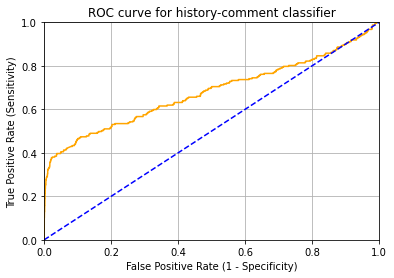

In [42]:
#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange')
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for history-comment classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

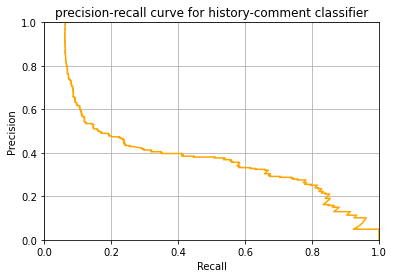

In [43]:
#precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall, color='orange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('precision-recall curve for history-comment classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

In [44]:
#ROC-AUC score
print(roc_auc_score(y_test, y_pred_prob))

0.678479570880692


# Repeating steps with balanced data

### Loading original data and balancing

In [45]:
data = pd.read_csv("project_18_dataset_combined.csv")
data = data[['label', 'text']]

#set display option
pd.set_option('display.max_colwidth', None)

#make target labels boolean
data['label']=data['label'].apply(lambda x: 1 if x == 14 else 0)

In [46]:
print(data.shape)
print(data.label.value_counts())
data.head()

(19821, 2)
0    18585
1     1236
Name: label, dtype: int64


,label,text
0,0,"Serious Youth Violence crimes, lone wolves basically."
1,0,Yesterday?
2,0,"I would argue with you, but it seems pointless. If I understand you, your argument is this: the UK can do whatever it wants the UK is never wrong"
3,0,"the whole thing is pretty dumb desu, school kids could be in a class of 12 or whatever all mingling and thats fine, but if they leave school and they all go to the park then thats not not allowed"
4,0,"I fucking hope you re right, lad."


In [47]:
#Balancing data
count_label_0, count_label_1 = data.label.value_counts()

data_label_1 = data[data['label'] == 1]
data_label_0 = data[data['label'] == 0]

data_label_0_b = data_label_0.sample(count_label_1, random_state=88)
data_b = pd.concat([data_label_0_b, data_label_1])
print(data_b.shape)
print(data_b.label.value_counts())
data_b.head()

(2472, 2)
0    1236
1    1236
Name: label, dtype: int64


,label,text
17921,0,pointing out the ruse is lower IQ than the people who just sit back and enjoy the show
17572,0,I am in bed dingus I am going to sleep Do not summon me again
15394,0,boy he just has the worst opinions about everything. But is he also the anti-awoo beaner?
19111,0,DAY OF THE RAKE!
189,0,Is it Constantine filming from the hell dimension?


### Lemmatizing and evaluating effect of lemmatization on balanced data

In [48]:
#lemmatizing
nlp = spacy.load('en_core_web_md')
data_b['text_lemmatized'] = data_b['text'].apply(lambda x: " ".join([words.lemma_ for words in nlp(x)]))

In [49]:
#train/test split on original and preprocessed data
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(data_b.text, data_b.label, test_size=0.2, random_state=88, stratify=data_b.label)
X_train, X_test, y_train, y_test = train_test_split(data_b.text_lemmatized, data_b.label, test_size=0.2, random_state=88, stratify=data_b.label)

In [50]:
#vectorizing train data and transforming test data
vectorizer = CountVectorizer()
X_train_old_dtm = vectorizer.fit_transform(X_train_old)
X_test_old_dtm = vectorizer.transform(X_test_old)
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

In [51]:
#train model on X_train_dtm
mnb_old = MultinomialNB()
mnb = MultinomialNB()
mnb_old.fit(X_train_old_dtm, y_train_old)
mnb.fit(X_train_dtm, y_train)

MultinomialNB()

In [52]:
#make class prediction for X_test_dtm
y_pred_class_old = mnb_old.predict(X_test_old_dtm)
y_pred_class = mnb.predict(X_test_dtm)

In [53]:
#comparing confusing matrices
print('old model cm:')
print(confusion_matrix(y_test_old, y_pred_class_old))
print('new model cm:')
print(confusion_matrix(y_test, y_pred_class))

old model cm:
[[114 134]
 [ 19 228]]
new model cm:
[[117 131]
 [ 18 229]]


In [54]:
#calculating accuracy, precison
print('accuracy score old model:', accuracy_score(y_test_old, y_pred_class_old))
print('accuracy score new model:', accuracy_score(y_test, y_pred_class))
print('-----')
print('precision score old model:', precision_score(y_test_old, y_pred_class_old))
print('precision score new model:', precision_score(y_test, y_pred_class))
print('-----')
print('recall score old model:', recall_score(y_test_old, y_pred_class_old))
print('recall score new model:', recall_score(y_test, y_pred_class))

accuracy score old model: 0.6909090909090909
accuracy score new model: 0.6989898989898989
-----
precision score old model: 0.6298342541436464
precision score new model: 0.6361111111111111
-----
recall score old model: 0.9230769230769231
recall score new model: 0.9271255060728745


### Spelling correction and evaluating effect of spell corrector on balanced data

In [55]:
#def spelling_corrector(txt):
#    blob = TextBlob(txt)
#    return str(blob.correct())


#data_b['text_spelling_corrected'] = data_b['text_lemmatized'].apply(lambda x : [spelling_corrector(x)])
#data_b.head()

In [56]:
#data_b['text_spelling_corrected2'] = data_b['text_lemmatized'].apply(lambda x: ' '.join(TextBlob(x).correct()))
#data_b.head

### Effect of random states on balanced data (ceteris paribus)

In [57]:
#make model with range of random states in train/test split

random_state_range = range(0, 1000)
rs_scores = []
for rs in random_state_range:
    vectorizer = CountVectorizer()
    mnb = MultinomialNB()
    X_train, X_test, y_train, y_test = train_test_split(data_b.text_lemmatized, data_b.label, random_state=rs, test_size=0.2, stratify=data_b.label)
    
    X_train_dtm = vectorizer.fit_transform(X_train)
    X_test_dtm = vectorizer.transform(X_test)
    
    mnb.fit(X_train_dtm, y_train)
    
    y_pred_class = mnb.predict(X_test_dtm)
    
    rs_scores.append(precision_score(y_test, y_pred_class))

mean precision: 0.6666906962235224
st.dev. of mean prec: 0.01775285240921235


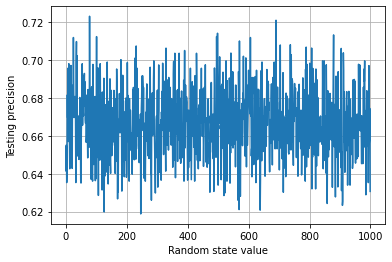

In [58]:
#calculating mean precision and standard deviation
print('mean precision:', mean(rs_scores))
print('st.dev. of mean prec:', stdev(rs_scores))

#make plot
plt.plot(random_state_range, rs_scores)
plt.xlabel('Random state value')
plt.ylabel('Testing precision')

plt.grid(True)

### Effect of test sizes on balanced data (ceteris paribus)

In [59]:
#make model with varying test sizes in train/test split
test_size_range = np.linspace(0.05,0.5,91)
test_size_scores = []

for ts in test_size_range:
    vectorizer = CountVectorizer()
    mnb = MultinomialNB()
    X_train, X_test, y_train, y_test = train_test_split(data_b.text_lemmatized, data_b.label, test_size=ts, random_state=88, stratify=data_b.label)
    
    X_train_dtm = vectorizer.fit_transform(X_train)
    X_test_dtm = vectorizer.transform(X_test)
    
    mnb.fit(X_train_dtm, y_train)
    
    y_pred_class = mnb.predict(X_test_dtm)
    
    test_size_scores.append(precision_score(y_test, y_pred_class))

mean precision: 0.6417491766627824
st.dev. of mean prec: 0.011843778534741965


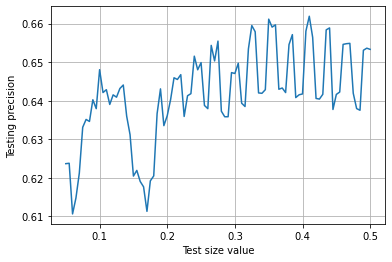

In [60]:
#calculating mean precision and standard deviation
print('mean precision:', mean(test_size_scores))
print('st.dev. of mean prec:', stdev(test_size_scores))

#make plot
plt.plot(test_size_range, test_size_scores)
plt.xlabel('Test size value')
plt.ylabel('Testing precision')

plt.grid(True)

### Hyperparameter tuning on balanced data

In [61]:
#train/test splitting
X_train, X_test, y_train, y_test = train_test_split(data_b.text_lemmatized, data_b.label, test_size=0.2, random_state=88, stratify=data_b.label)

In [62]:
#making pipeline
pipeline = Pipeline([ ('vectorizer', CountVectorizer()), ('classifier', MultinomialNB()) ])

#### Q: include ('tfidf', TfidfTransformer()) in pipeline???

In [63]:
#grid = {
    #'vectorizer__strip_accents': [None, 'ascii', 'unicode'], #works
    #'vectorizer__lowercase': [True, False], #works
    #'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)], #works
    #'vectorizer__stop_words': [None, 'english'], #works
    #'vectorizer__max_df': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5], #works
    #'vectorizer__min_df': [1, 0.001, 0.002, 0.005, 0.01, 0.02], #works
    #'vectorizer__max_features': [None, 1, 10, 100, 1000, 10000], #works
    #'classifier__alpha': [0.1, 0.5, 1.0, 2.0], #works
    #'classifier__fit_prior': [True, False], #works
    #'classifier__class_prior': [[0.1, 0.9], [0.1, 0.8], [0.2, 0.9], [0.2, 0.8]], #works
    #'tfidf__norm': ['l1', 'l2'], #works
    #'tfidf__use_idf': [True, False], #works
    #'tfidf__smooth_idf': [True, False], #works
    #'tfidf__sublinear_tf': [True, False], #works
#}

#grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='precision', cv=10)
#grid_search.fit(X, y)

#print("-----------")
#print(grid_search.best_score_)
#print(grid_search.best_params_)

In [64]:
grid = {}
        

grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='precision', cv=10)
grid_search.fit(data_b.text_lemmatized, data_b.label)

print(grid_search.best_score_)
print(grid_search.best_params_)

results = pd.DataFrame(grid_search.cv_results_)
results[['params', 'mean_test_score','std_test_score']]

0.6707594025308583
{}


,params,mean_test_score,std_test_score
0,{},0.670759,0.024654


### Evaluation between models with default and tuned parameters (balanced data)

In [65]:
#calculating accuracy, precison and roc_auc between models with default and tuned parameters
#set best parameters in pipeline for comparison

pipeline_old = Pipeline([ ('vectorizer', CountVectorizer()), ('classifier', MultinomialNB()) ])
pipeline = Pipeline([ ('vectorizer', CountVectorizer()), ('classifier', MultinomialNB()) ])
     
model_old = pipeline_old.fit(X_train, y_train)
model = pipeline.fit(X_train, y_train)

y_pred_class_old = model_old.predict(X_test)
y_pred_class = model.predict(X_test)

print('accuracy score before tuning model:', accuracy_score(y_test, y_pred_class_old))
print('accuracy score after tuning:', accuracy_score(y_test, y_pred_class))
print('-----')
print('precision score before tuning:', precision_score(y_test, y_pred_class_old))
print('precision score after tuning:', precision_score(y_test, y_pred_class))
print('-----')
print('recall score before tuning:', recall_score(y_test, y_pred_class_old))
print('recall score after tuning:', recall_score(y_test, y_pred_class))

accuracy score before tuning model: 0.6989898989898989
accuracy score after tuning: 0.6989898989898989
-----
precision score before tuning: 0.6361111111111111
precision score after tuning: 0.6361111111111111
-----
recall score before tuning: 0.9271255060728745
recall score after tuning: 0.9271255060728745


In [66]:
print(Counter(y_test))
print(Counter(y_pred_class_old))
print(Counter(y_pred_class))

Counter({0: 248, 1: 247})
Counter({1: 360, 0: 135})
Counter({1: 360, 0: 135})


In [67]:
#comparing confusing matrices
print('old model cm:')
print(confusion_matrix(y_test, y_pred_class_old))
print('new model cm:')
print(confusion_matrix(y_test, y_pred_class))

old model cm:
[[117 131]
 [ 18 229]]
new model cm:
[[117 131]
 [ 18 229]]


#### Q: Crossvalidation on final model???

### Examining results (balanced data)

In [68]:
#see false positive comments
false_positives = pd.DataFrame({'false_positives': X_test[(y_pred_class==1) & (y_test==0)]})
print(false_positives.shape)
false_positives

(131, 1)


,false_positives
17188,when you consider that the one on the right be originally cover with garish bright paint that completely hide the aesthetic of the marble I m apt to consider that maybe the Africans have well taste .
10162,"I mean sure , but what would you suggest the third most populated country choose out of the two ? I m glad there s only one china"
14006,"that s how anyone cope with loss or grief if they re healthy productive people . it do nt mean that they be nt grieve if they occupy their time with a hobby or work , they simply realize that the world do nt stop for you whenever you re sad . the true cure for depression be productive activity ."
8784,"some people may have state that , but I don t think it be a known fact yet , they could be mistaken or there may be a few diff strain go around , or it could be due to faulty testing result , which there be a lot of apparently"
2888,"I use to only shit once a day , I switch to two time a day and now I m a chad with a healthy anus"
...,...
18079,only a matter of time until cop start to go miss .
11882,soon you ll have to give that all up to a black family . you re do
8940,cope o p e
3237,""" pure "" gypsy they do nt exist , they be mix an look well"


In [69]:
#see false negative comments
false_negatives = pd.DataFrame({'false_negatives': X_test[(y_pred_class==0) & (y_test==1)]})
print(false_negatives.shape)
false_negatives

(18, 1)


,false_negatives
4340,if you ever try mytrueancestry they test your dna vs ancient population .
13029,what year be that ? I swear these fucking nigger can t move on from shit happen even a thousand year ago . and twitter be definitely make it an echochamber for express leave only think
9913,oh do they catch DB Cooper ? I miss that news .
6821,"ok now you re piss I off . what happen when you remove one specie from an ecosystem human haven t be remove you utter failed abortion . activity will have decline 50 % on average at most . you re so fucking dumb you think the Industrial Revolution happen overnight everywhere and that be the last time human activity be this low . because you re not just schizo , you re a fucking moron with concomitant dun - kruger narcissism . you really ought to kill yourself . and I assure you , you will ."
1276,"thank for the flag bro , and to the pagan estonian tribe who help we establish the territory Danish - Estonia . good time"
6522,that image lol why be rape Berlin wrong ?
6146,"sometimes I doubt if this be true , because I lose fat and my muscle size get noticable big and my weight go down . unironically yes . I don t do the stuff but a lot of drug habit will keep you skinny whether its weed cig or hard shit . almost all fat people do no drug . everyone be skinny in the 50 til the 80 and during this time americans be pop a lot of pill and everyone smoke cig ."
16274,"yes , definitely . it s like a domestic version of the deal Reagan work out with Iran so they wouldn t release their US hostage until after the 1980 election to damage Carter ."
14003,Pizza gate start in 1666
15473,"these guy be tough , they defeat a year old flag and some statue"


In [70]:
# store the vocabulary of X_train
X_train_tokens = vectorizer.get_feature_names()

# number of times each token appears across all history comments
hisco_token_count = mnb.feature_count_[1, :]

# number of times each token appears across all non-history comments
nhisco_token_count = mnb.feature_count_[0, :]

In [71]:
# create a DataFrame of tokens with their separate his and non-his counts
tokens = pd.DataFrame({'token':X_train_tokens, 'non_history':nhisco_token_count, 'history':hisco_token_count}).set_index('token')

# add 1 to each label counts to avoid dividing by 0
tokens['non_history'] = tokens.non_history + 1
tokens['history'] = tokens.history + 1

# convert his and non-his counts into frequencies
tokens['non_history'] = tokens.non_history / mnb.class_count_[0]
tokens['history'] = tokens.history / mnb.class_count_[1]

# calculate the ratio of his-to-non-his for each token
tokens['history_ratio'] = tokens.history / tokens.non_history

# calculate the ratio of non-his-to-his for each token
tokens['non_history_ratio'] = tokens.non_history / tokens.history

In [72]:
# examine the DataFrame sorted by history_comments_ratio
tokens_his = tokens.sort_values('history_ratio', ascending=False)
tokens_his[0:10]

,non_history,history,history_ratio,non_history_ratio
token,,,,
hitler,0.001618,0.084142,52.0,0.019231
century,0.001618,0.053398,33.0,0.030303
catholic,0.001618,0.038835,24.0,0.041667
family,0.003236,0.074434,23.0,0.043478
civilization,0.001618,0.033981,21.0,0.047619
rome,0.001618,0.032362,20.0,0.050000
slavery,0.001618,0.027508,17.0,0.058824
slave,0.003236,0.051780,16.0,0.062500
jfk,0.001618,0.025890,16.0,0.062500


In [73]:
# examine the DataFrame sorted by non_history_comments_ratio
tokens_non_his = tokens.sort_values('non_history_ratio', ascending=False)
tokens_non_his[0:10]

,non_history,history,history_ratio,non_history_ratio
token,,,,
test,0.024272,0.001618,0.066667,15.0
biden,0.022654,0.001618,0.071429,14.0
anyway,0.014563,0.001618,0.111111,9.0
humour,0.011327,0.001618,0.142857,7.0
fit,0.011327,0.001618,0.142857,7.0
tfw,0.011327,0.001618,0.142857,7.0
odd,0.009709,0.001618,0.166667,6.0
symptom,0.008091,0.001618,0.200000,5.0
organization,0.008091,0.001618,0.200000,5.0


In [74]:
# look up the history_ratio for a given token
#tokens.loc['', 'history_ratio']

### Threshold and further evaluation (balanced data)

In [75]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

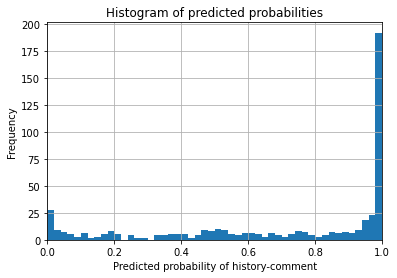

In [76]:
plt.hist(y_pred_prob, bins=50)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of history-comment')
plt.ylabel('Frequency')

plt.grid(True)

In [77]:
y_pred_class_new = binarize([y_pred_prob], 0.9)[0]

C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [78]:
print(confusion_matrix(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class_new))

[[117 131]
 [ 18 229]]
[[198  50]
 [ 49 198]]


In [79]:
print('default threshold accuracy:', accuracy_score(y_test, y_pred_class))
print('new threshold accuracy:', accuracy_score(y_test, y_pred_class_new))
print('-----')
print('default threshold precision:', precision_score(y_test, y_pred_class))
print('new threshold precision:', precision_score(y_test, y_pred_class_new))
print('-----')
print('default threshold recall:', recall_score(y_test, y_pred_class))
print('new threshold recall:', recall_score(y_test, y_pred_class_new))

default threshold accuracy: 0.6989898989898989
new threshold accuracy: 0.8
-----
default threshold precision: 0.6361111111111111
new threshold precision: 0.7983870967741935
-----
default threshold recall: 0.9271255060728745
new threshold recall: 0.8016194331983806


In [80]:
threshold_range = (np.linspace(0.01,0.99,99))
y_pred_class_precision_scores = []
y_pred_class_recall_scores = []

for th in threshold_range:
    #insert model also?
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred_class_new = binarize([y_pred_prob], th)[0]
    
    y_pred_class_precision_scores.append(precision_score(y_test, y_pred_class_new))
    y_pred_class_recall_scores.append(recall_score(y_test, y_pred_class_new))

C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.01 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.02 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.03 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.04 as keyword args. 

C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.29000000000000004 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.31 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.32 as 

C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.5800000000000001 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.59 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.61 as k

C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.91 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.92 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\phill\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.93 as keyword args. F

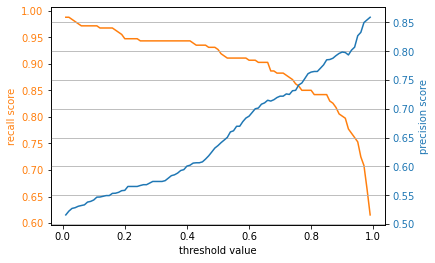

In [82]:
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('threshold value')
ax1.set_ylabel('recall score', color=color)
ax1.plot(threshold_range, y_pred_class_recall_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('precision score', color=color)
ax2.plot(threshold_range, y_pred_class_precision_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.grid(True)

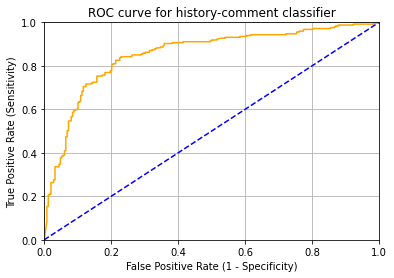

In [83]:
#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange')
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for history-comment classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

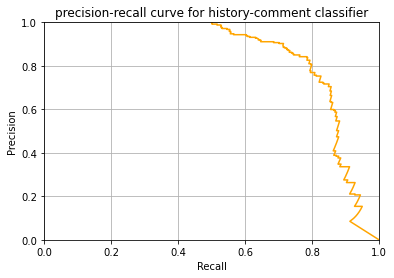

In [84]:
#precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall, color='orange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('precision-recall curve for history-comment classifier')
plt.xlabel('Recall') #or is it reverse????
plt.ylabel('Precision')
plt.grid(True)

In [85]:
#ROC-AUC score
print(roc_auc_score(y_test, y_pred_prob))

0.8528633929737494


#### Q: possible to import batch of his-comments?

#### Q: Pipeline for content analysis?